In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteECTWA1/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteECTWA1/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteECTWA1/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

LSTM 대신 conv1d

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 24s 62ms/step - loss: 0.4464 - accuracy: 0.7820 - val_loss: 0.3095 - val_accuracy: 0.8767
Epoch 2/10
391/391 [==============================] - 15s 39ms/step - loss: 0.2234 - accuracy: 0.9158 - val_loss: 0.3070 - val_accuracy: 0.8763
Epoch 3/10
391/391 [==============================] - 15s 37ms/step - loss: 0.1695 - accuracy: 0.9391 - val_loss: 0.3511 - val_accuracy: 0.8692
Epoch 4/10
391/391 [==============================] - 14s 36ms/step - loss: 0.1407 - accuracy: 0.9496 - val_loss: 0.3578 - val_accuracy: 0.8692
Epoch 5/10
391/391 [==============================] - 14s 36ms/step - loss: 0.1109 - accuracy: 0.9617 - val_loss: 0.4343 - val_accuracy: 0.8626
Epoch 6/10
391/391 [==============================] - 14s 36ms/step - loss: 0.0927 - accuracy: 0.9686 - val_loss: 0.4510 - val_accuracy: 0.8596
Epoch 7/10
391/391 [==============================] - 14s 35ms/step - loss: 0.0715 - accuracy: 0.9774 - val_loss: 0.5606 - val_accuracy:

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

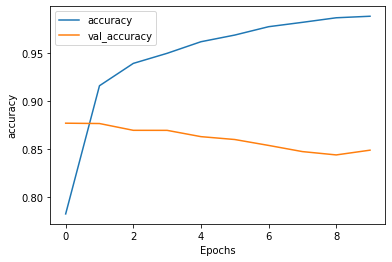

In [10]:
plot_graphs(history, 'accuracy')

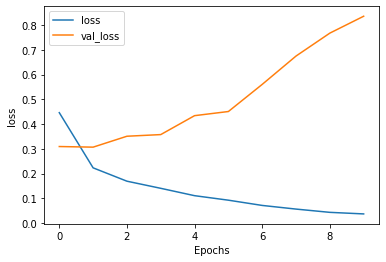

In [11]:
plot_graphs(history, 'loss')